<a href="https://colab.research.google.com/github/pstorniolo/Master2021/blob/main/L2_Words_As_Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Natural Language Processing from Scratch - Lesson 2**


---




### > Why Colab? 
Colab (Google Colaboratory) is a free cloud service based on Jupyter Notebooks that supports... FREE GPU!!! <3

Lectures will be held through Colab Notebooks. To download each notebook there are few and really simple steps to do:

( *only one thing is required ... having Google Drive or GitHub* )

1.   Click on  https://bit.ly/3oCpBP9 
2.   `File` > `Save a copy in Drive` / or `Save a copy on GitHub`
3.   (Drive option) Go to your `Drive` and check if the copied version of notebook is present into `Colab Notebooks` folder 
4.   (Github option) Choose which `repository` to copy the notebook to and than `open it with Colab`

## **Lesson 2 - Words as Vectors**
<h4><center> Goal: Understand the meaning and the semantic relations between words </center></h4>

So far we have talked about words, phrases, tokens, characters... 

But, as we well know, many Machine Learning algorithms and almost all Deep Learning architectures are incapable of processing strings or plain text in their raw form. They require numbers as inputs to perform any sort of job, be it classification, regression etc. in broad terms.

For this reason it is necessary a transformation from text to numerical values, (why not vectors?), which can as much as possible keep the meaning of the word without losing all that which the word evokes in the human mind. 

This transformation is known as **Word Embedding**, and this linguistic model is called **Vector Semantics**.



>  —  Word embedding is the collective name for a set of language modelling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. — (Wikipedia)


At the root of everything there is an hypothesis that was first formulated in the 1950th by linguists like Joos, Harris and Firth.


> **Distributional hypothesys**: words that occur in *similar context* tend to have *similar meanings*. 

In ohter words, this hypothesys creates a link between *similarity* in how words are distributed and similarity in what they mean.

The model knows as Vector Semantics instantiates this hypothesis by learning representations of the meaning of words directly from their distributions in text. 

Why the word 'Vector'? 

Along with the hypothesis, another intuition is at the base of this linguistic model: Osgood in 1957 described the meaning of words on the scale of three values: *valence*, *arousal* and *dominance*. 

<center><img src='https://miro.medium.com/max/530/0*aZD7eiXzGmqsm2a2
' width="430" height="210"></center>


Thus words like *happy* or *satisfied* are high on valence, while *unhappy* or *annoyed* are low on valence.

*Excited* or *frenzied* are high on arousal, while *relaxed* and *calm* are low on arousal.

*Important* or *controlling* are high on dominance, while *awed* and *influenced* are low in dominance. 

Every words, for Osgood, is thus represented by three numbers, corrisponding to its value on each of a space of three dimensions.

To conclude this introduction, we can say that Vector Semantics combines two intuitions:
* *distributionalist intuition* (defining a word by counting what other words occur in its environment)
* *vector intuition* (defining the meaning of a word $w$ as a vector, a point in a $N$-dim space.)



Vectors for representing words ($w$) are generally called **embeddings**, because the word is  embedded in a particular vector space. 

<center><img src='https://miro.medium.com/max/956/0*OPhacyNlOUa8lf9m
' width="580" height="310"></center>

(in the graph you can see how words with similar meaning are automatically distributed in meaningful clustering in space, the space represented here is a space we can say 'emotional' of words) 

Vector models of meaning are now the standard way to represent the meaning of words in NLP. 

in this lecture we will introduce the two most commonly used models of representation:
* Frequency based Embedding (sparse representation): 
  * Count Vector
  * TF-IDF Vector
* Prediction based Vector (dense representation) :
  * Word2Vec (CBOW and skipgram)


 ### How to measure similarity?
To define similarity between two target words $v$ and $w$, we need a measure for taking two such vectors and giving a measure of vector similarity. By far the most common similarity metric is the **cosine** of the angle between the vectors. 

The cosine is based on the **dot-product** operator from linear algebra:
$$
\underline{v} \cdot \underline{w} = \sum_{i=1}^{N} v_{i}w_{i} = v_{1}w_{1}+v_{2}w_{2}+...+v_{N}w_{N}  
$$
where $\underline{v}$,$\underline{w}\in{R^{N}}$.

The dot product acts as a similarity metric because it will tend to be high just when the two vectors have large values in the same dimensions. Alternatively, vectors that have zeros in different dimensios - orthogonal vectors - will have a dot product of 0, representing their strong dissimilarity.

The raw dot-product, however, has a problem as a similarity metric: it favors **long** vectors.  The vector length is defined as:
$$
|\underline{v}| = \sqrt(\sum_{i=1}^{N}v_{i}^{2})
$$

In NLP, if we decide to represent a word based on its frequency in a document, its enbedding will result in a vector as long as the word is frequent.

The raw dot-product thus will be higher for frequent words.

As usual in mathematics, we **normalize** the dot product in order to make the measure independent of the module of vectors. 


Following from the trigonometric definition of dot product
$$
\underline{a}\cdot\underline{b} = |\underline{a}||\underline{b}|cos\theta
$$
$$
\frac{\underline{a}\cdot\underline{b}}{|\underline{a}||\underline{b}|} = cos\theta
$$

We can define **cosine similarity** between two vectors $\underline{v}$ and $\underline{w}$ as
$$
cosine(\underline{v},\underline{w}) = \frac{\underline{v}\cdot\underline{w}}{|\underline{v}||\underline{w}|} = \frac{\sum_{i=1}^{N} v_{i}w_{i}}{}
$$

We know that $cosine(\underline{v}, \underline{w}) \in [-1,1]$, its value tends to $1$ for vectors pointing in the same directions, it is $0$ for vectors that are orthogonal, to $-1$ for vectors pointing in opposite directions. But raw frequency values are non-negative, so the cosine for these vectors ranges from $0$ to $1$. 

<center><img src='https://miro.medium.com/max/701/0*wXBT2F8qHQoGnIvp
' width="520" height="260"></center>


##Frequency based Embedding (just a Quick Overview)#
### Count Vector Matrix
Consider a corpus $C$ of $D$ documents ${D_{1},D_{2},...,D_{D}}$ and $V$ unique tokens extracted out of the corpus $C$. The $V$ tokens will form our dictionary $\mathbf{V}$ and the size of the Count Vector matrix $M$ will be given by $D$x$N$. Each row in the matrix $M$ contains the frequency of tokens in document $D_{i}$.

$D_{1}$: "He is a lazy boy. She is also lazy."

$D_{2}$: "Neeraj is a lazy person."

The dictionary created may be a list of unique tokens in the corpus = $[‘He’,’She’,’lazy’,’boy’,’Neeraj’,’person’]$

Here, $D=2$, $V=6$

The count matrix $M$ of size $2$ x $6$ will be represented as –

             He	She	lazy	boy	Neeraj	person

    D1  	 1   	1	   2	   1	   0	    0

    D2	   0	  0	   1	   0	   1	    1



<center><img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/04164920/count-vector.png
' width="320" height="260"></center>

### TF-IDF
This is another method which is based on the frequency method but it is different to the count vectorization in the sense that it takes into account not just the occurrence of a word in a single document but in the entire corpus.

Common words like 'is', 'the', 'a' etc. tend to appear quite frequently in comparison to the words which are important to a document. 

Ideally, what we would want is to down weight the common words occurring in almost all documents and give more importance to words that appear in a subset of documents.

TF-IDF stands for Term Frequency - Inverse Document Frequency adn it his computed as the product of these two terms. 

**In summary** the frequency models we’ve described so far represents a target
word as a vector with dimensions corresponding to all the words in the vocabulary $\mathbf{V}$ (length $V=|\mathbf{V}|$, with vocabularies of $20,000$ to $50,000$), which is also sparse (most values are zero). The values in each dimension are the frequency with which the target word co-occurs with each neighboring context word, weighted by tf-idf. The model
computes the similarity between two words $x$ and $y$ by taking the cosine of their tf-idf vectors; high cosine, high similarity. 

The tf-idf vector model can also be used to decide if *two documents are similar*.
We represent a document by taking the vectors of all the words in the document, and
centroid computing the centroid of all those vectors. The centroid is the multidimensional
version of the mean.



> I know that it may seem old, too simple and rudimentary, but in reality it is much more used than one might think (key-word for search engine, topic modelic). It is a first important step in the information extraction pipeline of a text.

### Co-Occurrence Matrix 
The basic idea is, as we have just said, the distributional hypotesys: 


> Similar words tend to occur together and will have similar context, for example – Apple is a fruit. Mango is a fruit.
Apple and mango tend to have a similar context i.e fruit.



* **Co-occurrence** – For a given corpus, the co-occurrence of a pair of words say $w_{1}$ and $w_{2}$ is the number of times they have appeared together in a Context Window.

* **Context Window** – Context window is specified by a number and the direction. So what does a context window of 2 (around) means?
<p>&nbsp;</p>
<table border="0" cellspacing="0">
<colgroup span="8" width="85"></colgroup>
<tbody>
<tr>
<td style="text-align: center;" align="left" bgcolor="#66FF99" height="17">Quick</td>
<td style="text-align: center;" align="left" bgcolor="#66FF99"><span style="color: #000000;">Brown</span></td>
<td style="text-align: center;" align="left" bgcolor="#FF6600"><span style="color: #000000;">Fox</span></td>
<td style="text-align: center;" align="left" bgcolor="#66FF99">Jump</td>
<td style="text-align: center;" align="left" bgcolor="#66FF99">Over</td>
<td style="text-align: center;" align="left">The</td>
<td style="text-align: center;" align="left">Lazy</td>
<td style="text-align: center;" align="left">Dog</td>
</tr>
</tbody>
</table>
<p>&nbsp;</p>
<table border="0" cellspacing="0">
<colgroup span="8" width="85"></colgroup>
<tbody>
<tr>
<td style="text-align: center;" align="left" height="17">Quick</td>
<td style="text-align: center;" align="left">Brown</td>
<td style="text-align: center;" align="left" bgcolor="#66FF99">Fox</td>
<td style="text-align: center;" align="left" bgcolor="#66FF99">Jump</td>
<td style="text-align: center;" align="left" bgcolor="#FF6600">Over</td>
<td style="text-align: center;" align="left" bgcolor="#66FF99">The</td>
<td style="text-align: center;" align="left" bgcolor="#66FF99">Lazy</td>
<td style="text-align: center;" align="left">Dog</td>
</tr>
</tbody>
</table>

Now, let us take an example corpus to calculate a co-occurrence matrix.

> Corpus = He is not lazy. He is intelligent. He is smart.

<p>&nbsp;</p>
<table border="0" cellspacing="0">
<colgroup span="7" width="85"></colgroup>
<tbody>
<tr>
<td align="center" bgcolor="#CCFF00" height="17"><b> </b></td>
<td align="center" bgcolor="#CCFF00"><b>He</b></td>
<td align="center" bgcolor="#CCFF00"><b>is</b></td>
<td align="center" bgcolor="#CCFF00"><b>not</b></td>
<td align="center" bgcolor="#CCFF00"><b>lazy</b></td>
<td align="center" bgcolor="#CCFF00"><b>intelligent</b></td>
<td align="center" bgcolor="#CCFF00"><b>smart</b></td>
</tr>
<tr>
<td align="center" bgcolor="#CCFF00" height="17"><b>He</b></td>
<td align="center" bgcolor="#CCCCCC">0</td>
<td align="center" bgcolor="#FF3333">4</td>
<td align="center" bgcolor="#CCCCCC">2</td>
<td align="center" bgcolor="#CCCCCC">1</td>
<td align="center" bgcolor="#CCCCCC">2</td>
<td align="center" bgcolor="#CCCCCC">1</td>
</tr>
<tr>
<td align="center" bgcolor="#CCFF00" height="17"><b>is</b></td>
<td align="center" bgcolor="#CCCCCC">4</td>
<td align="center" bgcolor="#CCCCCC">0</td>
<td align="center" bgcolor="#CCCCCC">1</td>
<td align="center" bgcolor="#CCCCCC">2</td>
<td align="center" bgcolor="#CCCCCC">2</td>
<td align="center" bgcolor="#CCCCCC">1</td>
</tr>
<tr>
<td align="center" bgcolor="#CCFF00" height="17"><b>not</b></td>
<td align="center" bgcolor="#CCCCCC">2</td>
<td align="center" bgcolor="#CCCCCC">1</td>
<td align="center" bgcolor="#CCCCCC">0</td>
<td align="center" bgcolor="#CCCCCC">1</td>
<td align="center" bgcolor="#CCCCCC">0</td>
<td align="center" bgcolor="#CCCCCC">0</td>
</tr>
<tr>
<td align="center" bgcolor="#CCFF00" height="17"><b>lazy</b></td>
<td align="center" bgcolor="#CCCCCC">1</td>
<td align="center" bgcolor="#CCCCCC">2</td>
<td align="center" bgcolor="#CCCCCC">1</td>
<td align="center" bgcolor="#CCCCCC">0</td>
<td align="center" bgcolor="#00CCFF">0</td>
<td align="center" bgcolor="#CCCCCC">0</td>
</tr>
<tr>
<td align="center" bgcolor="#CCFF00" height="17"><b>intelligent</b></td>
<td align="center" bgcolor="#CCCCCC">2</td>
<td align="center" bgcolor="#CCCCCC">2</td>
<td align="center" bgcolor="#CCCCCC">0</td>
<td align="center" bgcolor="#CCCCCC">0</td>
<td align="center" bgcolor="#CCCCCC">0</td>
<td align="center" bgcolor="#CCCCCC">0</td>
</tr>
<tr>
<td align="center" bgcolor="#CCFF00" height="17"><b>smart</b></td>
<td align="center" bgcolor="#CCCCCC">1</td>
<td align="center" bgcolor="#CCCCCC">1</td>
<td align="center" bgcolor="#CCCCCC">0</td>
<td align="center" bgcolor="#CCCCCC">0</td>
<td align="center" bgcolor="#CCCCCC">0</td>
<td align="center" bgcolor="#CCCCCC">0</td>
</tr>
</tbody>
</table>


Let’s say there are $V$ unique words in the corpus. So Vocabulary size = $V$. The columns of the Co-occurrence matrix form the context words. The different variations of Co-Occurrence Matrix are 

* A co-occurrence matrix of size $V$x$V$. Now, for even a decent corpus $V$ gets very large and difficult to handle. So generally, this architecture is never preferred in practice.
* A co-occurrence matrix of size $V$x$N$ where $N$ is a subset of $V$ and can be obtained by removing irrelevant words like stopwords etc. for example. This is still very large and presents computational difficulties.

*  A co-occurrence matrix of size $V$x$k$ where $k$ are the $k$ components of the PCA decomposition of the original co-occurrence matrix. 

 
What PCA does at the back is decompose Co-Occurrence matrix into three matrices,$U$,$S$ and $V$ where $U$ and $V$ are both orthogonal matrices. What is of importance is that dot product of $U$ and $S$ gives the word vector representation and $V$ gives the word context representation.

<center><img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/04224842/svd2.png
' width="720" height="150"></center>



In [ ]:
import string
import pprint
import numpy as np
from collections import Counter

text = """Mary had a little lamb, little lamb,
    little lamb. Mary had a little lamb
    whose fleece was white as snow.
    And everywhere that Mary went
    Mary went, Mary went. Everywhere
    that Mary went,
    The lamb was sure to go"""

# Tokenization 
def extract_words(text):
    temp = text.split() # Split the text on whitespace
    text_words = []

    for word in temp:
        # Remove any punctuation characters present in the beginning of the word
        while word[0] in string.punctuation:
            word = word[1:]

        # Remove any punctuation characters present in the end of the word
        while word[-1] in string.punctuation:
            word = word[:-1]

        # Append this word into our list of words.
        text_words.append(word.lower())
        
    return text_words

text_words = extract_words(text)
print(text_words)

['mary', 'had', 'a', 'little', 'lamb', 'little', 'lamb', 'little', 'lamb', 'mary', 'had', 'a', 'little', 'lamb', 'whose', 'fleece', 'was', 'white', 'as', 'snow', 'and', 'everywhere', 'that', 'mary', 'went', 'mary', 'went', 'mary', 'went', 'everywhere', 'that', 'mary', 'went', 'the', 'lamb', 'was', 'sure', 'to', 'go']


This is a wasteful way to represent text. We can be much more efficient by representing each word by a number.

In [ ]:
word_dict = {}  # Maps words to integers
word_list = []  # Maps each integer to the corresponding word
vocabulary_size = 0
text_tokens = []

pp = pprint.PrettyPrinter(indent=2)

for word in text_words:
    # If we are seeing this word for the first time, create an id for it and added it to our word dictionary
    if word not in word_dict:
        word_dict[word] = vocabulary_size
        word_list.append(word)
        vocabulary_size += 1
    
    # add the token corresponding to the current word to the tokenized text.
    text_tokens.append(word_dict[word])

print("Word list:", word_list, "\n\n Word dictionary:")
pp.pprint(word_dict)

Word list: ['mary', 'had', 'a', 'little', 'lamb', 'whose', 'fleece', 'was', 'white', 'as', 'snow', 'and', 'everywhere', 'that', 'went', 'the', 'sure', 'to', 'go'] 

 Word dictionary:
{ 'a': 2,
  'and': 11,
  'as': 9,
  'everywhere': 12,
  'fleece': 6,
  'go': 18,
  'had': 1,
  'lamb': 4,
  'little': 3,
  'mary': 0,
  'snow': 10,
  'sure': 16,
  'that': 13,
  'the': 15,
  'to': 17,
  'was': 7,
  'went': 14,
  'white': 8,
  'whose': 5}


Unfortunately, while this representation is convenient for memory reasons it has some severe limitations. Perhaps the most important of which is the fact that computers naturally assume that numbers can be operated on mathematically (by addition, subtraction, etc) in a way that doesn't match our understanding of words.

**One-hot encoding**

One typical way of overcoming this difficulty is to represent each word by a one-hot encoded vector where every element is zero except the one corresponding to a specific word.

In [ ]:
def one_hot(word, word_dict):
    """
        Generate a one-hot encoded vector corresponding to *word*
    """
    
    vector = np.zeros(len(word_dict))
    vector[word_dict[word]] = 1
    
    return vector

In [ ]:
# So, for example, the word "fleece" would be represented by
fleece_hot = one_hot("fleece", word_dict)
print(fleece_hot)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


**Bag of words**

We can now use the one-hot encoded vector for each word to produce a vector representation of our original text, by simply adding up all the one-hot encoded vectors:



In [ ]:
text_vector1 = np.zeros(vocabulary_size)

for word in text_words:
    hot_word = one_hot(word, word_dict)
    text_vector1 += hot_word
    
print(text_vector1)

[6. 2. 2. 4. 5. 1. 1. 2. 1. 1. 1. 1. 2. 2. 4. 1. 1. 1. 1.]


A more pythonic (and efficient) way of producing the same result is to use the standard `Counter` module:

In [ ]:
word_counts = Counter(text_words)
pp.pprint(word_counts)

Counter({ 'mary': 6,
          'lamb': 5,
          'little': 4,
          'went': 4,
          'had': 2,
          'a': 2,
          'was': 2,
          'everywhere': 2,
          'that': 2,
          'whose': 1,
          'fleece': 1,
          'white': 1,
          'as': 1,
          'snow': 1,
          'and': 1,
          'the': 1,
          'sure': 1,
          'to': 1,
          'go': 1})


**Term Frequency - Inverse Document Frequency**

![alt text](https://camo.githubusercontent.com/b2802c1f94a48ea27024d862ef83587521397c50/68747470733a2f2f736561626f726e2e7079646174612e6f72672f5f696d616765732f736561626f726e2d686561746d61702d312e706e67)

To measure the document frequency of a word we will need to have multiple documents. For the sake of simplicity, we will treat each sentence of our nursery rhyme as an individual document:

In [ ]:
corpus_text = text.split('.')
corpus_words = []

for document in corpus_text:
    doc_words = extract_words(document)
    corpus_words.append(doc_words)
pp.pprint(corpus_words)

[ ['mary', 'had', 'a', 'little', 'lamb', 'little', 'lamb', 'little', 'lamb'],
  [ 'mary',
    'had',
    'a',
    'little',
    'lamb',
    'whose',
    'fleece',
    'was',
    'white',
    'as',
    'snow'],
  ['and', 'everywhere', 'that', 'mary', 'went', 'mary', 'went', 'mary', 'went'],
  [ 'everywhere',
    'that',
    'mary',
    'went',
    'the',
    'lamb',
    'was',
    'sure',
    'to',
    'go']]


In [ ]:
# Let us now calculate the number of documents in which each word appears
document_count = {}

for document in corpus_words:
    word_set = set(document)
    
    for word in word_set:
        document_count[word] = document_count.get(word, 0) + 1

pp.pprint(document_count)

{ 'a': 2,
  'and': 1,
  'as': 1,
  'everywhere': 2,
  'fleece': 1,
  'go': 1,
  'had': 2,
  'lamb': 3,
  'little': 2,
  'mary': 4,
  'snow': 1,
  'sure': 1,
  'that': 2,
  'the': 1,
  'to': 1,
  'was': 2,
  'went': 2,
  'white': 1,
  'whose': 1}


In [ ]:
def inv_doc_freq(corpus_words):
    number_docs = len(corpus_words)
    
    document_count = {}

    for document in corpus_words:
        word_set = set(document)

        for word in word_set:
            document_count[word] = document_count.get(word, 0) + 1
    
    IDF = {}
    
    for word in document_count:
        IDF[word] = np.log(number_docs/document_count[word])
        
    
    return IDF

IDF = inv_doc_freq(corpus_words)

pp.pprint(IDF)

{ 'a': 0.6931471805599453,
  'and': 1.3862943611198906,
  'as': 1.3862943611198906,
  'everywhere': 0.6931471805599453,
  'fleece': 1.3862943611198906,
  'go': 1.3862943611198906,
  'had': 0.6931471805599453,
  'lamb': 0.28768207245178085,
  'little': 0.6931471805599453,
  'mary': 0.0,
  'snow': 1.3862943611198906,
  'sure': 1.3862943611198906,
  'that': 0.6931471805599453,
  'the': 1.3862943611198906,
  'to': 1.3862943611198906,
  'was': 0.6931471805599453,
  'went': 0.6931471805599453,
  'white': 1.3862943611198906,
  'whose': 1.3862943611198906}


As expected **Mary** has the smallest weight of all words 0, meaning that it is effectively removed from the dataset.

In [ ]:
def tf_idf(corpus_words):
    IDF = inv_doc_freq(corpus_words)
    
    TFIDF = []
    
    for document in corpus_words:
        TFIDF.append(Counter(document))
    
    for document in TFIDF:
        for word in document:
            document[word] = document[word]*IDF[word]
            
    return TFIDF

tf_idf(corpus_words)

NameError: ignored



---

## Prediction based Vector 

So far, we have seen deterministic methods to determine word vectors. 

Word2Vec was introduced in 2013 by Mikolov et al. at Google on efficient vector representations of words (link at the [paper](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)).

These methods were prediction based in the sense that they provided probabilities to the words and proved to be state of the art for tasks like word analogies and word similarities.

**Word2vec** is not a single algorithm but a combination of two techniques – **CBOW**(Continuous Bag of Words) and **Skip-gram** model. Algorithmically, these models are similar, except that CBOW predicts target words from source context words, while the skip-gram does the inverse and predicts source context-words from the target words.

Suppose to have the sentence 
<center> "The cat jumped over the puddle" </center> 

and want to compute an embedding for `jumped`. 
The intuition of word2vec is that instead of counting how often each word $w$ occurs near, `jumped`, we’ll instead train a classifier on a binary prediction task: `Is word w likely to show up near jumped?` .

We don’t actually care about this prediction task; instead we’ll take the learned *classifier weights* as the word embeddings. 

The revolutionary intuition here is that we can just use the running text as implicity supervised training data for such a classifier.

The representations made with Word2Vec seem to capture many linguistic regularities. 

We see that vectors learned these relevant relations:

* Man is to woman as king is to queen (King – Man + Woman = Queen)
* Building is to architect as software is to programmer (Software - Building + Architect = Programmer)


<center><img src='https://cdn.datafloq.com/cms/2019/04/30/ai8.png
' width="550" height="400"></center>

In similar way, these are the Country-Capital relations maintained by Word2Vec

<center><img src='https://adriancolyer.files.wordpress.com/2016/04/word2vec-ee-table-8.png?w=656&zoom=2
' width="570" height="300"></center>




The Word2Vec models are fast, efficient to train, and easily available online with code adn pretrained embeddings. 

It generates *dense embedding vectors*, dimension of these vectors is an hyper-parameter of the alghoritm, the **embedding size**. 

In general, it makes the size of the embedding vary between $200$ and $500$ if your domain is very large, the most used value is $300$. Otherwise between $100$ and $300$ with a less extended domain. They are obviously all rules of thumb, there is no mathematical proof that taking one dimension with respect to another gives one more performance.

Word2Vec consists of 2 algorithms.

* CBOW: The neural network takes a look at the surrounding words and predicts the word that comes in between.

* SkipGram: The neural network takes in a word and then tries to predict the surrounding words.

#### CBOW (Continuous Bag of Words) Model
*Predicting a center word form the
surrounding context*

Mokilov's idea is simplicity.

We don't talk about deep networks, we don't talk about non-linear hidden layers. 

We talk about networks with only one hidden layer and mostly linear. What you do inside this layer, a simple average (for contexts greater than $1$) or simply pass the cards to the output.

<center><img src='https://miro.medium.com/max/670/1*vZhxrBkCz-yN_rzZBqSKiA.png'></center>

As we have said, everything is based on the context, the first thing to define is in fact the context window we want to consider. 

Imagine a sliding window over the text, that includes the central word currently in focus, together with, in the case of having chosen a window of four,  the four words and precede it, and the four words that follow it:

<center><img src='https://adriancolyer.files.wordpress.com/2016/04/word2vec-context-words.png?w=656&zoom=2
' width="650" height="210"></center>

The context words form the input layer. Each word is encoded in one-hot form, so if the vocabulary size is V these will be V-dimensional vectors with just one of the elements set to one, and the rest all zeros.


Word2vec uses a single hidden layer, fully connected neural network as shown below. *The neurons in the hidden layer are all linear neurons*. The hidden layer size is set to the dimensionality of the resulting word vectors. The size of the output layer is same as the input layer.

The training objective is to maximize the conditional probability of observing the actual output word (the focus word) given the input context words, with regard to the weights.

<center><img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/04224109/Screenshot-from-2017-06-04-22-40-29.png
' width="350" height="210"></center>


<center><img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/04220606/Screenshot-from-2017-06-04-22-05-44.png
' width="350" height="350"></center>






































Since our input vectors are one-hot, multiplying an input vector by the weight matrix $W1$ amounts to simply selecting a row from $W1$.

<center><img src='https://adriancolyer.files.wordpress.com/2016/04/word2vec-linear-activitation.png?w=656&zoom=2
' width="500" height="300"></center>

Given $C$ input word vectors, the activation function for the hidden layer h amounts to simply summing the corresponding ‘hot’ rows in $W1$, and dividing by $C$ to take their average.

>This implies that the link (activation) function of the hidden layer units is simply linear (i.e., directly passing its weighted sum of inputs to the next layer).

From the hidden layer to the output layer, the second weight matrix $W2$ can be used to compute a score for each word in the vocabulary, and $softmax$ can be used to obtain the posterior distribution of words.

We breakdown the way this model works in these steps:

1. We generate our one hot word vectors $(x^{(c−m)},..., x^{(c−1)}, x^{(c+1)},...,x^{(c+m)})$ for the input context of size m.
2. We get our embedded word vectors for the context 
 $(v_{c−m}= W_{1}x^{(c-m)},..., v_{c+m}= W_{1}x^{(c+m)})$
3. Average these vectors to get $ \hat{v}=\frac{v_{c-m}+v_{c-m+1}+...+v_{c+m}}{2m} $
4. Generate a score vector $z = W_{2}\hat{v}$
5. Turn the scores into probabilities $\hat{y} = softmax(z)$
6. We desire our probabilities generated, $\hat{y}$, to match the true probabilities, $y$, which also happens to be the one hot vector of the
actual word.
7. Training is made of Cross-Entropy Loss function and Back Propagation.


Gensim is a Python library for topic modeling, document indexing and similarity retrieval with large corpora, contains implementations of fasttext, word2vec, LDA, tf-idf


To implement the `word2vec model`, we’ll use the **gensim** library ([gensim wod2vec documentation](https://radimrehurek.com/gensim/models/word2vec.html)) which provides many features in the model such as finding the odd one out, most similar words etc. However, it does not lowercase/tokenize the sentences, so I do the same. The tokenized sentences are then passed to the model. I’ve set the *size of vector* to be *2*, *window* to be *3* which defines the distance upto which to look and *sg = 0* uses the CBOW model.

In [ ]:
# Just a very simple example of how to create an embedding given your own corpus using word2vec model of `gensim` library.
from gensim.models import word2vec 

sentences = [
    'He is playing in the field.',
    'He is running towards the football.',
    'The football game ended.',
    'It started raining while everyone was playing in the field.'
]

for i, sentence in enumerate(sentences):
	tokenized= []
	for word in sentence.split(' '):
		word = word.split('.')[0] 
		word = word.lower()
		tokenized.append(word)
	sentences[i] = tokenized




embedding_size = 6
print(sentences)

[['he', 'is', 'playing', 'in', 'the', 'field'], ['he', 'is', 'running', 'towards', 'the', 'football'], ['the', 'football', 'game', 'ended'], ['it', 'started', 'raining', 'while', 'everyone', 'was', 'playing', 'in', 'the', 'field']]


`class gensim.models.word2vec.Word2Vec(sentences=None, corpus_file=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, iter=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), max_final_vocab=None)`  (https://radimrehurek.com/gensim/models/word2vec.html) 

In [ ]:
# alpha : float, The initial learning rate.
# iter : int, Number of iterations (epochs) over the corpus.
model = word2vec.Word2Vec(sentences, workers = 1, size = embedding_size, min_count = 1, window = 2, sg = 0,iter=1000, compute_loss=True, batch_words=1) 

NameError: ignored

In [ ]:
vector = model.wv['playing']  # numpy vector of embedding of word 'raining'
print(vector)

NameError: ignored

In [ ]:
# View the Vocabulary, ATTENTION to do this with large vocabularies
# The trained word vectors are stored in a KeyedVectors instance in model.wv:
model.wv.vocab

{'ended': <gensim.models.keyedvectors.Vocab at 0x7f516466b2e8>,
 'everyone': <gensim.models.keyedvectors.Vocab at 0x7f516466b320>,
 'field': <gensim.models.keyedvectors.Vocab at 0x7f516466b0f0>,
 'football': <gensim.models.keyedvectors.Vocab at 0x7f516466b160>,
 'game': <gensim.models.keyedvectors.Vocab at 0x7f516466b1d0>,
 'he': <gensim.models.keyedvectors.Vocab at 0x7f51646e9a20>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7f516466b080>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7f517259a748>,
 'it': <gensim.models.keyedvectors.Vocab at 0x7f516466b208>,
 'playing': <gensim.models.keyedvectors.Vocab at 0x7f517259a7b8>,
 'raining': <gensim.models.keyedvectors.Vocab at 0x7f516466b2b0>,
 'running': <gensim.models.keyedvectors.Vocab at 0x7f516466b198>,
 'started': <gensim.models.keyedvectors.Vocab at 0x7f516466b278>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7f516466b0b8>,
 'towards': <gensim.models.keyedvectors.Vocab at 0x7f516466b128>,
 'was': <gensim.models.keyedvectors.Voc

In [ ]:
model.wv[model.wv.vocab] # It's a different order, here embeddings is of sorted keys

array([[-4.49293712e-03, -1.34685829e-01,  3.60356510e-01,
         8.23740140e-02,  9.70428810e-02, -1.79023042e-01],
       [ 8.91096133e-05, -5.42577133e-02,  2.35974565e-01,
         2.85202507e-02, -5.95583860e-03, -1.39510423e-01],
       [-9.23706815e-02, -2.51447503e-02,  4.33969557e-01,
         1.56407550e-01,  9.53966230e-02, -2.48711437e-01],
       [-1.57394916e-01, -8.61947909e-02,  5.06874263e-01,
         5.27862795e-02,  5.41486740e-02, -2.83928812e-01],
       [-2.24667162e-01, -9.04246271e-02,  4.79372174e-01,
         1.06965557e-01,  1.17606103e-01, -2.12957919e-01],
       [-1.66331321e-01, -7.35694021e-02,  4.83612418e-01,
         1.97481662e-01,  9.84610692e-02, -1.80011272e-01],
       [-1.41832232e-01, -4.78229001e-02,  2.92892724e-01,
        -2.15399247e-02, -2.83952095e-02, -2.11588740e-01],
       [ 2.76846369e-03,  4.71777283e-03,  2.09954336e-01,
        -1.80740263e-02, -2.79798470e-02, -1.72566906e-01],
       [-7.29497671e-02, -1.07343748e-01,  1.981

In [ ]:
# And now, let's check the similarity
print(model.wv.similarity('playing', 'football'))
print(model.wv.similarity('playing', 'while'))

0.93276083
0.96473026


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
print(model.wv.most_similar('playing'))
print(model.wv.most_similar('football'))

[('it', 0.9917640089988708), ('field', 0.9775766730308533), ('started', 0.9773678183555603), ('was', 0.9728482365608215), ('everyone', 0.9713796377182007), ('in', 0.9670824408531189), ('while', 0.9647303223609924), ('raining', 0.9646284580230713), ('the', 0.9619563817977905), ('he', 0.9461178779602051)]
[('raining', 0.9844321012496948), ('while', 0.9605823755264282), ('in', 0.947970986366272), ('he', 0.945022463798523), ('it', 0.9431756734848022), ('the', 0.9411342144012451), ('started', 0.9393022060394287), ('playing', 0.9327608346939087), ('field', 0.9315495491027832), ('was', 0.9290846586227417)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
# Here, we ask our model to give us the word that does not belong to the list!
print(model.wv.doesnt_match(['football', 'playing', 'while']))
#print(model_fasttext.wv.doesnt_match(['football', 'playing', 'while']))

football


/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


It’s hard to visualize the word embedding directly, for they usually have more than 3 dimensions. 

**T-SNE** is a non-linear dimensionality reduction algorithm that attempts to represent high-dimensional data and the underlying relationships between vectors in a lower-dimensional space.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

To make the visualizations more relevant, we will look at the relationships between a query word (in **red**), its most similar words in the model (in **blue**), and other words from the vocabulary (in **green**). (https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial#Exploring-the-model) 

In [ ]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    @ word = is the target word
    @ list_names = list of most dissimilar words to compare with the most similar words    
    """
    arrays = np.empty((0, embedding_size), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word], topn = 3) # It takes the 3 most similar words
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality with PCA
    reduc = PCA(n_components=embedding_size-1).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
   
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(arrays) # If you want to do PCA before, replace 'arrays' with 'reduc'
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


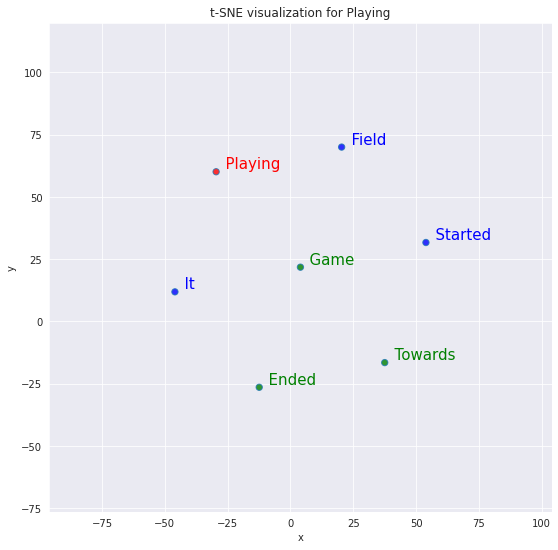

In [ ]:
# Compare the word with the 3 most similar and 3 most dissimilar words
tsnescatterplot(model, 'playing', [i[0] for i in model.wv.most_similar(negative=["playing"], topn=3)])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


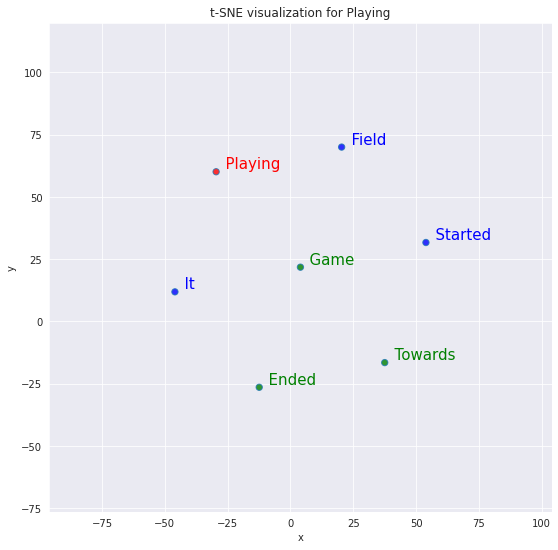

In [ ]:
tsnescatterplot(model, 'playing', [i[0] for i in model.wv.most_similar(negative=["playing"], topn=3)])

Gensim is a topic modelling library for Python that provides access to Word2Vec and other word embedding algorithms for training, and it also allows **pre-trained word embeddings** that you can download from the internet to be loaded.

## Pre-trained Word Embeddings

Pre-trained models are the simplest way to start working with word embeddings. A pre-trained model is a set of word embeddings that have been created elsewhere that you simply load onto your computer and into memory.

The **advantage** of these models is that they can leverage massive datasets that you may not have access to, built using billions of different words, with a vast corpus of language that captures word meanings in a statistically robust manner. 

Pre-trained models are also **available in languages other than English**, opening up multi-lingual opportunities for your applications.

The **disadvantage** of pre-trained word embeddings is that the words contained within may not capture the peculiarities of language in your specific application domain. For example, Wikipedia may not have great word exposure to particular aspects of legal doctrine or religious text, so if your application is specific to a domain like this, your results may not be optimal due to the generality of the downloaded model’s word embeddings.

#### Pre-trained models in Gensim
To load a pre-trained model into Gensim you first need to find and download one. 

A popular pre-trained option is the Google News dataset model, containing **300-dimensional embeddings for 3 millions words**.

Download the binary file ‘GoogleNews-vectors-negative300.bin’ (1.3 GB compressed) from https://code.google.com/archive/p/word2vec/.
 



In [ ]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-10-24 12:31:23--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.98.158
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.98.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  76.3MB/s    in 17s     

2020-10-24 12:31:41 (90.9 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
from gensim.models import KeyedVectors

EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'

# Load vectors directly from the file
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# Access vectors for specific words with a keyed lookup:
vector = word2vec['easy']
# see the shape of the vector (300,)
vector.shape

(300,)

In [ ]:
vector

array([ 0.30664062,  0.06835938, -0.16015625,  0.11962891, -0.00656128,
        0.00439453,  0.14453125,  0.06201172,  0.07177734,  0.0267334 ,
        0.09912109, -0.02307129,  0.05664062, -0.17480469, -0.05322266,
        0.08984375,  0.29492188, -0.06591797,  0.13574219, -0.17382812,
        0.07324219,  0.20800781,  0.07275391,  0.21972656, -0.05029297,
       -0.11523438, -0.18066406, -0.00000429, -0.16992188, -0.07617188,
       -0.00430298,  0.171875  ,  0.2578125 , -0.13378906,  0.03955078,
        0.00424194, -0.02807617, -0.15429688,  0.17675781,  0.06689453,
        0.27148438, -0.14355469,  0.40234375, -0.11914062, -0.02587891,
       -0.05639648,  0.0378418 ,  0.04296875,  0.02929688, -0.02111816,
       -0.04150391,  0.06298828, -0.01904297, -0.06103516, -0.16699219,
        0.10546875,  0.0004406 , -0.18164062,  0.19042969,  0.06982422,
       -0.08642578, -0.06835938, -0.30859375, -0.125     , -0.01672363,
       -0.10351562, -0.25976562,  0.02294922, -0.10107422, -0.00

In [ ]:
vectors = [word2vec[x] for x in "This is some text I am processing with Spacy".split(' ')]
len(vectors)

9

In [ ]:
a = word2vec.similarity('straightforward', 'easy')
a 

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.5717044

In [ ]:
word2vec.most_similar('simple')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('straightforward', 0.7460168600082397),
 ('Simple', 0.7108173966407776),
 ('uncomplicated', 0.6297484636306763),
 ('simplest', 0.6171397566795349),
 ('easy', 0.5990299582481384),
 ('fairly_straightforward', 0.5893307328224182),
 ('deceptively_simple', 0.5743066072463989),
 ('simpler', 0.5537199378013611),
 ('simplistic', 0.5516539216041565),
 ('disarmingly_simple', 0.5365327000617981)]

### How evaluate Word2vec model (or any other embedding model)
One way to evaluate the word2vec model is to develop a **ground truth** set of words. Ground truth will represent words that should ideally be closest together in vector space. For example if your corpus is related to customer service, perhaps the vectors for "dissatisfied" and "disappointed" will ideally have the smallest euclidean distance or largest cosine similarity.

You create this table for ground truth, maybe it has 200 paired words. These 200 words are the most important paired words for your industry / topic. To assess which word2vec model is best, simply calculate the distance for each pair, do it 200 times, sum up the total distance, and the smallest total distance will be your best model. 


### Limitations of Word2Vec
While Word2Vec was a game-changer for NLP, we will see how there was still some room for improvement:

* **Out of Vocabulary(OOV) Words**
  
  In Word2Vec, an embedding is created for each word. As such, it can’t handle any words it has not encountered during its training.

  For example, words such as “tensor” and “flow” are present in the vocabulary of Word2Vec. But if you try to get embedding for the compound word “tensorflow”, you will get an out of vocabulary error.

  <center><img src=https://amitness.com/images/word2vec-oov-tensorflow.png></center>

* **Morphology**

  For words with same radicals such as “eat” and “eaten”, Word2Vec doesn’t do any parameter sharing. Each word is learned uniquely based on the context it appears in. Thus, there is scope for utilizing the internal structure of the word to make the process more efficient.

<center><image src= "https://amitness.com/images/word2vec-radicals.png"></center>



---
### From Word2Vec to FastText

<center><img src='https://fasttext.cc/img/fasttext-logo-color-web.png
' width="300" height="70"></center>


To solve the above challenges, Bojanowski et al. proposed a new embedding method called FastText. Their key insight was to use the internal structure of a word to improve vector representations obtained from the skip-gram method.

The modification to the skip-gram method is applied as follows:

* **1. Sub-word generation**

  Instead of feeding individual words into the Neural Network, FastText breaks words into several n-grams (sub-words). 

For instance, the tri-grams for the word *apple* is *app*, *ppl*, and *ple* (ignoring the starting and ending of boundaries of words). The word embedding vector for apple will be the sum of all these n-grams. After training the Neural Network, we will have word embeddings for all the n-grams given the training dataset. Rare words can now be properly represented since it is highly likely that some of their n-grams also appears in other words.

> Word2vec treats each word in corpus like an atomic entity and generates a vector for each word.

> FastText treats each word as composed of character ngrams. So the vector for a word is made of the sum of this character n grams

First, we take a word and add angular brackets to denote the beginning and end of a word

<center><img src="https://amitness.com/images/fasttext-angular-brackets.png">
</center>

Then, we generate character n-grams of length n. For example, for the word “eating”, character n-grams of length 3 can be generated by sliding a window of 3 characters from the start of the angular bracket till the ending angular bracket is reached. Here, we shift the window one step each time.

<center><img src="https://amitness.com/images/fasttext-3-grams-list.png"></center>

Paper Insight:

FastText improves performance on syntactic word analogy tasks significantly for morphologically rich language like Czech and German.

<center><img src="https://amitness.com/images/fasttext-syntactic-analogy.png"></center>

Language 	word2vec-skipgram |	word2vec-cbow	| fasttext

Czech	52.8	55.0	**77.8**

German	44.5	45.0	**56.4**

English	70.1	69.9	**74.9**

Italian	51.5	51.8	**62.7**

FastText has degraded performance on semantic analogy tasks compared to Word2Vec.

<center><img src="https://amitness.com/images/fasttext-semantic-analogy.gif"></center>

There are **two main advantages** of fastText:
*  Generate better word embeddings for **rare words** (parole rare ma gli ngrammi saranno gia' presenti negli embedding)
*  **Out of vocabulary words** - they can construct the vector for a word from its character n grams even if word doesn't appear in training corpus



Now, in a similar way to before, we're going to use `gensim` to create embedding with **fastText** to be able to compare them with those of word2vec ([fastText gensim documentation](https://radimrehurek.com/gensim/models/fasttext.html)). 

In [ ]:
from gensim.models import FastText
model_fasttext = FastText(sentences, size=embedding_size, window=3, min_count=1, workers=1,sg=0)

FastText offers embedding calculated with its algorithm in 157 languages, just download and use them!

Have a try with Italian embedding, you only need to download it from https://fasttext.cc/docs/en/crawl-vectors.html

---------------------------------
Final Exercise:: Sentiment Classification with fastText and Keras at link --> https://bit.ly/37HnVwU 